# SVM(Support Vector Machine)

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
import pandas as pd
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 30)

In [6]:
import numpy as np
np.unique(cancer.target, return_counts=True)
# 0이 212개, 1이 357개

(array([0, 1]), array([212, 357], dtype=int64))

- 표준정규분포로 정규화

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cancer_std = scaler.fit_transform(cancer.data)
df = pd.DataFrame(cancer_std, columns=cancer.feature_names)
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,...,-2.333224e-15,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2021
)

- 모델 생성, 학습 및 평가

In [9]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9824561403508771

- 하이퍼 파라미터 조정

In [10]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [11]:
params = {'C': [0.01, 0.1, 1., 5., 10., 100.]}

In [12]:
from sklearn.model_selection import GridSearchCV
svc = SVC(random_state=2021)
grid_svc = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=5)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=2021),
             param_grid={'C': [0.01, 0.1, 1.0, 5.0, 10.0, 100.0]},
             scoring='accuracy')

In [13]:
grid_svc.best_params_

{'C': 5.0}

In [14]:
params = {'C': [2,3,4,5,6,7,8,9]}
svc = SVC(random_state=2021)
grid_svc = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=5)
grid_svc.fit(X_train, y_train)
grid_svc.best_params_
# 아래에 나온 값이 최선의 경우

{'C': 3}

- 최적 파라미터로 학습한 모델로 평가

In [15]:
grid_svc.best_estimator_.score(X_test, y_test)

0.9824561403508771

- Toy MNIST 손글씨 (load_digits)를 SVM으로 분류 
    - 내가 푼 것

In [23]:
from sklearn.datasets import load_digits
mnist = load_digits()
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [27]:
np.unique(mnist.data, return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16.]),
 array([56272,  4095,  3296,  2944,  3261,  2803,  2559,  2627,  3464,
         2585,  2711,  2845,  3668,  3509,  3609,  4304, 10456],
       dtype=int64))

In [33]:
from sklearn.preprocessing import MinMaxScaler
min_max_sc = MinMaxScaler()
mnist_min_max_sc = min_max_sc.fit_transform(mnist.data)
mnist.data.shape

(1797, 64)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, stratify=mnist.target, test_size=0.2, random_state=2021
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [35]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9861111111111112

In [37]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [46]:
params = {'C': [0.01, 0.1, 1, 5, 10]}

In [49]:
from sklearn.model_selection import GridSearchCV
svc = SVC(random_state=2021)
grid_svc = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=5)
grid_svc.fit(X_train, y_train)
grid_svc.best_params_

{'C': 5}

In [50]:
params = {'C': [2,3,4,5,6,7,8,9,10]}
svc = SVC(random_state=2021)
grid_svc = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=5)
grid_svc.fit(X_train, y_train)
grid_svc.best_params_

{'C': 6}

In [51]:
grid_svc.best_estimator_.score(X_test, y_test)

0.9805555555555555

- Toy MNIST 손글씨 (load_digits)를 SVM으로 분류 
    - 풀이

In [52]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [53]:
digits.frame

In [57]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [58]:
type(digits.images)

numpy.ndarray

In [60]:
digits.images.shape     # 1797개의 8*8 이미지

(1797, 8, 8)

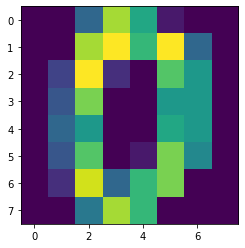

In [61]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0])    
plt.show()

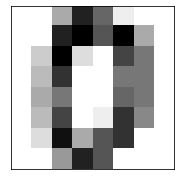

In [65]:
# 참고 : https://matplotlib.org/stable/index.html#
plt.figure(figsize=(3,3))
plt.imshow(digits.images[0], cmap=plt.cm.binary, interpolation='nearest')        # cmap 사용해서 color값 없애고 보여주기
                                                                                 # interpolation='nearest': A와 B 값 사이의 값이 특정 값과 가깝다면,
                                                                                 #                          그 값을 선택한다. A와 가깝다면, 값은 A가 된다. (보간?법) 
plt.xticks([]), plt.yticks([])
plt.show()

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data/16, digits.target, stratify=digits.target, test_size=0.2, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# 1797개의 데이터는 이미지 데이터이기때문에, y_test[0]는 확인이 불가능하다?
#   - 그렇다면, 어떻게 확인해볼 수 있을까? => DF를 만들어보자

((1437, 64), (360, 64), (1437,), (360,))

In [67]:
y_test[0]

1

In [68]:
import pandas as pd
df = pd.DataFrame(digits.data/16)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.3750,0.8125,0.6250,0.0000,0.0000,0.0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0000,0.6875,1.0000,0.6250,0.0000,0.0
2,0.0,0.0,0.0000,0.2500,0.9375,0.7500,0.0,0.0,0.0,0.0,...,0.3125,0.0,0.0,0.0,0.0000,0.1875,0.6875,1.0000,0.5625,0.0
3,0.0,0.0,0.4375,0.9375,0.8125,0.0625,0.0,0.0,0.0,0.5,...,0.5625,0.0,0.0,0.0,0.4375,0.8125,0.8125,0.5625,0.0000,0.0
4,0.0,0.0,0.0000,0.0625,0.6875,0.0000,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0000,0.1250,1.0000,0.2500,0.0000,0.0


In [69]:
df = pd.DataFrame(digits.data/16)
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.3750,0.8125,0.6250,0.0000,0.0000,0.0,0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.6875,1.0000,0.6250,0.0000,0.0,1
2,0.0,0.0,0.0000,0.2500,0.9375,0.7500,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.1875,0.6875,1.0000,0.5625,0.0,2
3,0.0,0.0,0.4375,0.9375,0.8125,0.0625,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.4375,0.8125,0.8125,0.5625,0.0000,0.0,3
4,0.0,0.0,0.0000,0.0625,0.6875,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0000,0.1250,1.0000,0.2500,0.0000,0.0,4


In [70]:
X = df.iloc[:, :-1]     # 기존의 인덱스값을 가지게 됨
                        # cf) df.iloc[:, :-1].values : 기존의 인덱스를 무시하고 shuffling된 인덱스를 가진다.
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [71]:
y_test.iloc[0]

1

In [72]:
y_test.index[0]

267

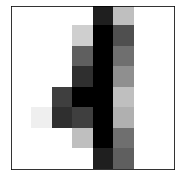

In [73]:
plt.figure(figsize=(3,3))
plt.imshow(digits.images[267], cmap=plt.cm.binary, interpolation='nearest')      
plt.xticks([]), plt.yticks([])
plt.show()

- 모델 생성, 하이퍼 파라미터 튜닝

In [74]:
svc = SVC(random_state=2021)
params = {'C': [0.1, 1, 5, 10]}
grid_svc = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=3)
grid_svc.fit(X_train, y_train)
grid_svc.best_params_

{'C': 5}

In [75]:
svc = SVC(random_state=2021)
params = {'C': [2,3,4,5,6,7,8,9]}
grid_svc = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=3)
grid_svc.fit(X_train, y_train)
grid_svc.best_params_

{'C': 3}

In [76]:
best_svc = grid_svc.best_estimator_
best_svc.score(X_test, y_test)

0.9805555555555555

- 실제 테스트 : 테스트데이터 셋의 iloc 값이 10, 20, 30 번째 데이터

In [77]:
y_test.iloc[10:40:10]

48      0
1724    2
686     8
Name: target, dtype: int32

In [78]:
best_svc.predict(X_test.iloc[10:40:10, :])

array([0, 2, 8])

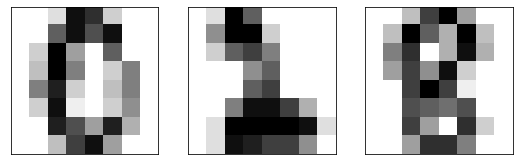

In [82]:
# tolist() 참고 : https://www.delftstack.com/ko/api/python-pandas/pandas-series-series.tolist-function/, https://ddolcat.tistory.com/729
plt.figure(figsize=(9,3))
for i, index in enumerate(y_test.index[10:40:10].tolist()):
    plt.subplot(1, 3, i+1)
    plt.imshow(digits.images[index], cmap=plt.cm.binary, interpolation='nearest')      
    plt.xticks([]), plt.yticks([])
plt.show()